TRABALHO FINAL
O Trabalho Final, que poderá ser realizado em grupo de até 3 componentes, terá como tema as "Desigualdades Educacionais no Brasil". O Trabalho Final deverá ser elaborado no formato de artigo científico, contendo as seguintes seções: Resumo, Introdução, Métodos, Resultados, Conclusões e Referências. Seguindo formato de apresentação de trabalhos e artigos em diversas revistas e congressos, o artigo a ser elaborado por vocês deverá seguir as seguintes normas:

1) Máximo de 2500 palavras (sem contar as referências bibliográficas)

2) Capa com identidade visual da Universidade de Brasília, incluindo IE e Departamento de Estatística. Título do artigo. Nome dos autores. Data

3) Máximo de 5 tabelas e 5 gráficos.

O Trabalho Final utilizará os dados dos resultados do SAEB - 9o. ano do Ensino Fundamental de 2017 (amostras recebidas no início do semestre), e deverá considerar na análise:

Como fatores ou variáveis explicativas:
ao menos uma entre as seguintes variáveis (AREA, REGIÃO, LOCALIZAÇÃO)
ao menos três entre as seguintes variáveis (SEXO, RAÇA/COR, IDADE, ESCOLARIDADE DA MÃE, TRABALHO, USO DO TEMPO) 
Como variáveis de interesse ou variáveis a serem explicadas
ao menos uma entre as seguintes variáveis (NOTA_LP, NOTA_MT)
ao menos uma entre as seguintes variáveis (USO DO TEMPO, AFAZERES DOMÉSTICOS, PERSPECTIVAS)
OBS: A variável IDADE deve ser construída a partir da variável ANO de NASCIMENTO, e poderá ser categorizada em: 1) Não tem defasagem idade/série (para nascidos a partir de 2002, e 2) Tem defasagem idade/série (para nascidos antes de 2002)

Critérios de avaliação:

Apresentação da questão a ser abordada no artigo e dos objetivos da análise de dados?
Coerência do trabalho (tem um fio condutor claro?) 
Estrutura do trabalho (Apresenta: resumo? título? introdução? métodos? resultados que embasam a discussão sobre as desigualdades educacionais? conclusão? referências bibliográficas?)  
Ferramentas estatísticas corretas para a análise dos dados utilizados, com justificativa mencionada em "Métodos".
Respeito às normas de apresentação do artigo estabelecidas acima.

In [1]:
%%capture
# loading R extension
%load_ext rpy2.ipython
# importing Python modules
import pandas as pd

In [2]:
%%capture
%%R
library(tidyverse) # loading R's package tidyverse

In [4]:
saeb = pd.read_csv('../data/saeb.csv',
    usecols = ['LOCALIZACAO',
    'RACA_COR',
    'SEXO',
    'ESC_MAE',
    'NOTA_LP',
    'NOTA_MT',
    'AFAZERES_DOM']) # loading the data

In [57]:
#  ~ RD || RI + Loc --- Notas || Afazeres
#  RD & RI + Raça_cor --- Notas e Afazeres
#       RD + Esc_mae --- Notas
#  ~     RI + sexo --- Afazeres

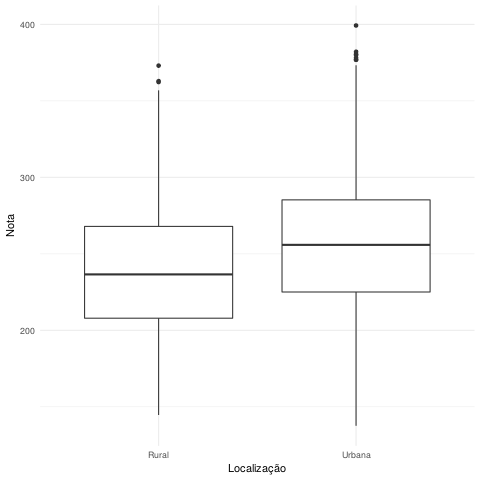

In [55]:
%%R -i saeb
ggplot(saeb) +
    aes(x = LOCALIZACAO, y = (NOTA_LP + NOTA_MT)/2) + 
    geom_boxplot() +
    theme_minimal() +
    labs(x = 'Localização', y = 'Nota')

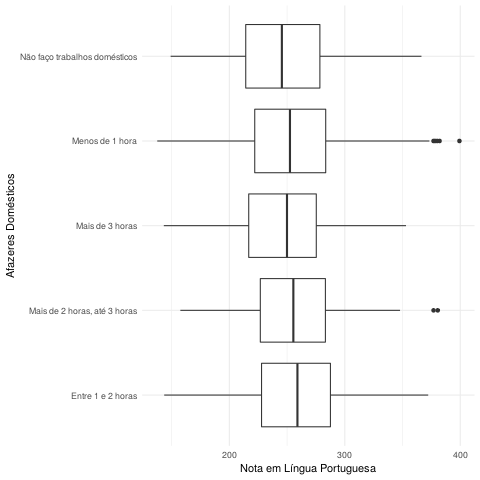

In [56]:
%%R -i saeb
ggplot(saeb) +
    aes(x = (NOTA_LP + NOTA_MT)/2, y = AFAZERES_DOM) + 
    geom_boxplot() +
    theme_minimal() +
    labs(x = 'Nota em Língua Portuguesa', y = 'Afazeres Domésticos')

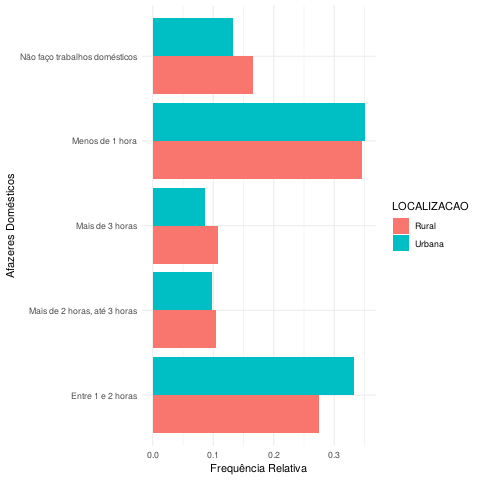

In [53]:
%%R -i saeb
saeb_af_loc <- saeb[,c('LOCALIZACAO', 'AFAZERES_DOM')] %>%
    table() %>%
    as_tibble() %>%
    group_by(LOCALIZACAO) %>%
    mutate(prop = n/sum(n))
saeb_af_loc %>% ggplot() +
    aes(x = prop, y = AFAZERES_DOM, fill = LOCALIZACAO) + 
    geom_col(position = 'dodge', ) +
    theme_minimal() +
    labs(x = 'Frequência Relativa', y = 'Afazeres Domésticos')

In [ ]:
saeb[,c('RACA_COR', 'AFAZERES_DOM')] %>%
    table() %>%
    as_tibble() %>%
    ggplot() +
    aes(x = n, y = AFAZERES_DOM, fill = SEXO) + 
    geom_col(position = 'dodge') +
    theme_minimal() +
    labs(x = 'Nota em Língua Portuguesa', y = 'Afazeres Domésticos')

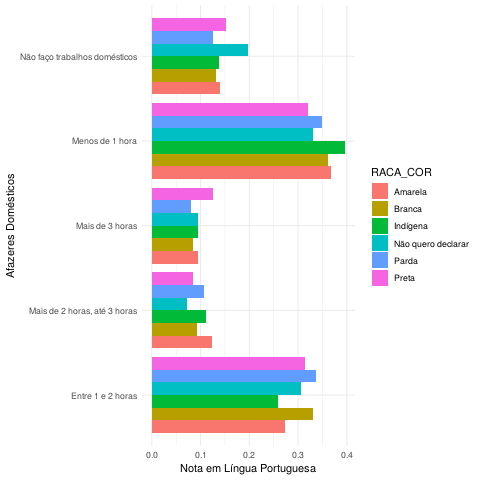

In [65]:
%%R -i saeb
#  RD & RI + Raça_cor --- Notas e Afazeres
saeb[,c('RACA_COR', 'AFAZERES_DOM')] %>%
    table() %>%
    as_tibble() %>%
    group_by(RACA_COR) %>%
    mutate(prop = n/sum(n)) %>%
    ggplot() +
    aes(x = prop, y = AFAZERES_DOM, fill = RACA_COR) + 
    geom_col(position = 'dodge') +
    theme_minimal() +
    labs(x = 'Frequência', y = 'Afazeres Domésticos')

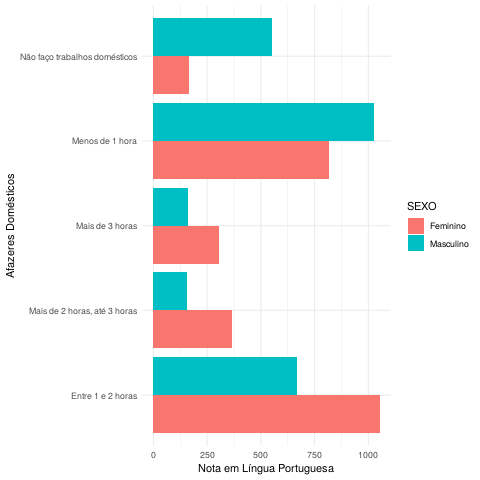

In [38]:
%%R -i saeb

saeb[,c('SEXO', 'AFAZERES_DOM')] %>%
    table() %>%
    as_tibble() %>%
    ggplot() +
    aes(x = n, y = AFAZERES_DOM, fill = SEXO) + 
    geom_col(position = 'dodge') +
    theme_minimal() +
    labs(x = 'Nota em Língua Portuguesa', y = 'Afazeres Domésticos')